In [6]:
from google.colab import files
uploaded = files.upload()


Saving CLEAN_FIFA23_official_data.csv to CLEAN_FIFA23_official_data (1).csv


In [40]:
import pandas as pd
import numpy as np


df = pd.read_csv("CLEAN_FIFA23_official_data.csv")

# Check basic info
print(df.info())  # Columns, non-null counts, data types
print(df.head())  # First 5 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                17660 non-null  int64  
 1   ID                        17660 non-null  int64  
 2   Name                      17660 non-null  object 
 3   Age                       17660 non-null  int64  
 4   Photo                     17660 non-null  object 
 5   Nationality               17660 non-null  object 
 6   Flag                      17660 non-null  object 
 7   Overall                   17660 non-null  int64  
 8   Potential                 17660 non-null  int64  
 9   Club                      17660 non-null  object 
 10  Club Logo                 17660 non-null  object 
 11  Value(£)                  17660 non-null  float64
 12  Wage(£)                   17660 non-null  float64
 13  Special                   17660 non-null  int64  
 14  Prefer

**Removing Unnecessary Columns**

In [41]:
# Columns to drop
cols_to_drop = ['Unnamed: 0', 'Photo', 'Flag', 'Club Logo', 'Real Face', 'Kit Number', 'Body Type']
df.drop(cols_to_drop, axis=1, inplace=True)

**Clean Loan Data**

In [42]:
# Fill missing 'Loaned From' with 'Not on Loan'
df['Loaned From'] = df['Loaned From'].fillna('Not on Loan')

# Create binary 'Is_Loaned' column
df['Is_Loaned'] = df['Loaned From'].apply(lambda x: 0 if x == 'Not on Loan' else 1)

**Convert Years Data Types**

In [43]:
# Convert 'Contract Valid Until' to datetime (assuming it's year as float)
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'], format='%Y')
# Convert 'Joined' to datetime
df['Joined'] = pd.to_datetime(df['Joined'])

**Creating New Features**

In [44]:
# Calculate years at club
current_year = pd.to_datetime('2023').year
df['Years_at_Club'] = current_year - df['Joined'].dt.year

# Create binary columns for preferred foot
df['Right_Footed'] = df['Preferred Foot'].apply(lambda x: 1 if x == 'Right' else 0)

**Final Check**

In [45]:
# Check missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value(£)                    0
Wage(£)                     0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Position                    0
Joined                      0
Loaned From                 0
Contract Valid Until        0
Height(cm.)                 0
Weight(lbs.)                0
Release Clause(£)           0
Best Overall Rating         0
Year_Joined                 0
Is_Loaned                   0
Years_at_Club               0
Right_Footed                0
dtype: int64
ID                                   int64
Name                                object
Age                                  int64
Nationality                         object
Overa

# **Analysis:**

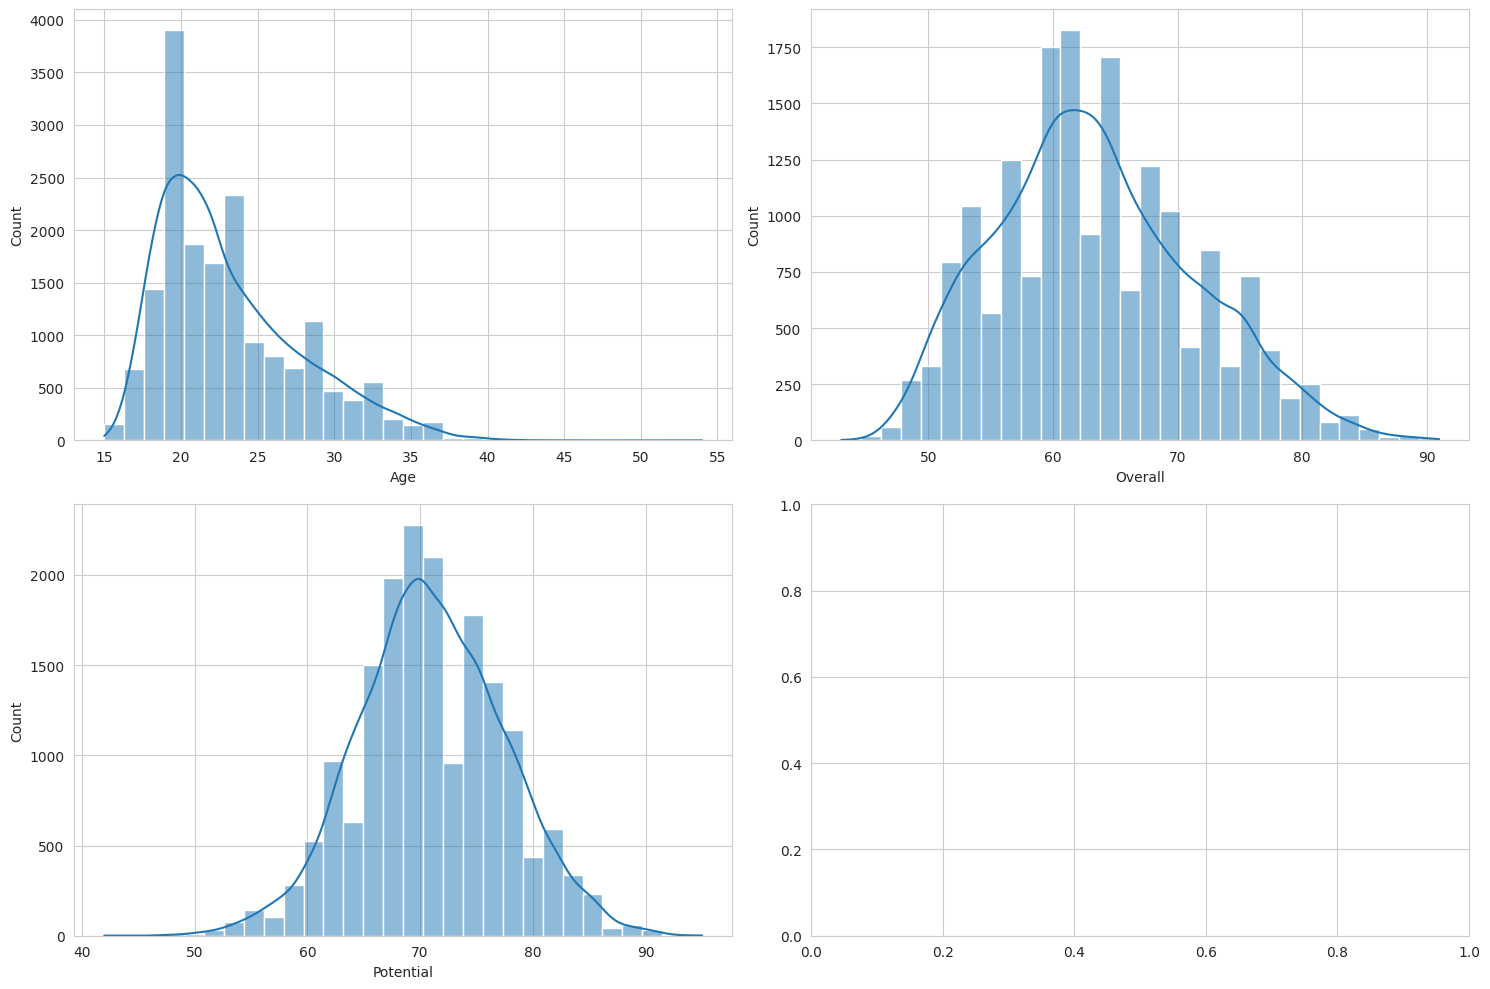

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Plot distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[0,0])
sns.histplot(df['Overall'], bins=30, kde=True, ax=axes[0,1])
sns.histplot(df['Potential'], bins=30, kde=True, ax=axes[1,0])
plt.tight_layout()

**Insights:**

Most players are aged 20-30 (peak career years).

Overall ratings follow a normal distribution (mean ~65).

**Rating Distribution by Position**

Text(0.5, 1.0, 'Rating Distribution by Position')

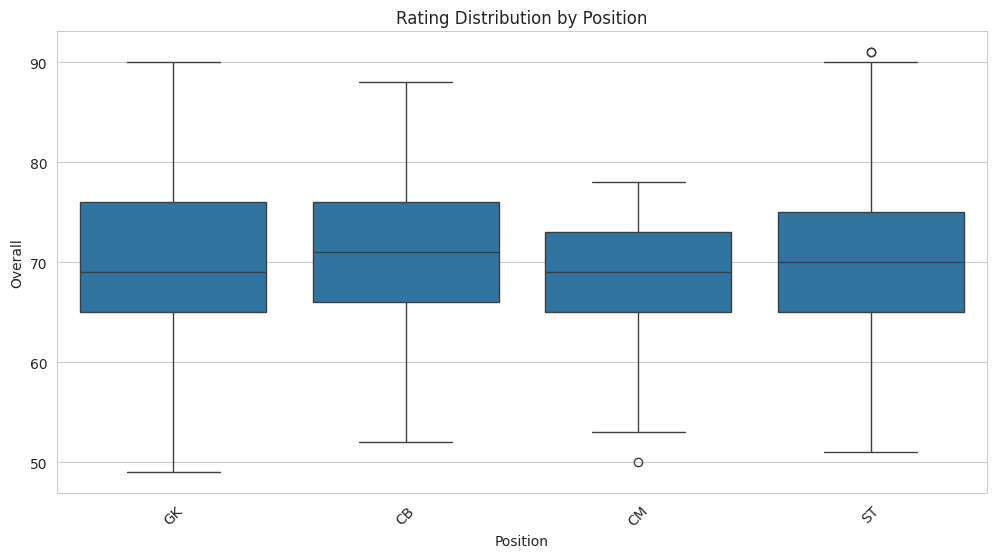

In [38]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Position', y='Overall', order=['GK', 'CB', 'CM', 'ST'])
plt.xticks(rotation=45)
plt.title("Rating Distribution by Position")

**Insights:**

Strikers (ST) have the highest median ratings.

Goalkeepers (GK) show less rating variance than outfield players.

# **Corelation Heatmap:**

<Axes: >

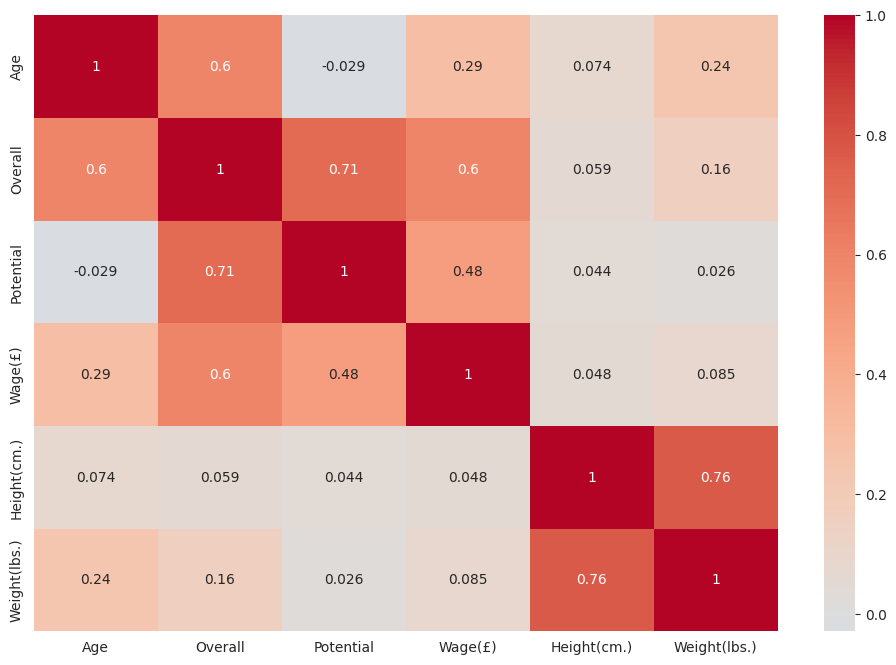

In [39]:
plt.figure(figsize=(12,8))
corr_matrix = df[['Age', 'Overall', 'Potential', 'Wage(£)', 'Height(cm.)', 'Weight(lbs.)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)

**Insights:**

*   Overall and Wage show strong correlation (0.6).
*   Age slightly negatively correlates with potential (old players tend to be less skilled)
*   Wage and Potential are positively corelated
*   Height and Weight has a very strong corelation (which is obvious)


**Interactive 3D plotting**

In [48]:
import plotly.express as px
px.scatter_3d(df.sample(1000),
              x='Age',
              y='Overall',
              z='Height(cm.)',
              color='Position',
              hover_name='Name')